In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats


## Scales of measurement
### Nominal  : identifier       - *Categorical*
### Ordinal: Likert scale / Order of scale  - *Categorical*
### Interval  : numerical data + continuous data & discrete    - *Cotinuous and numerical*
### Ratio : *numerical data + continuous data & discrete*

continuous : measure 
discrete:   count 



In [6]:
from google.colab import files
uploaded = files.upload()
import io
df= pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv']))

Saving Admission_Predict.csv to Admission_Predict (2).csv


In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [0]:
df.drop("Serial No.",axis=1,inplace=True)

In [14]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## distribution of university rating 

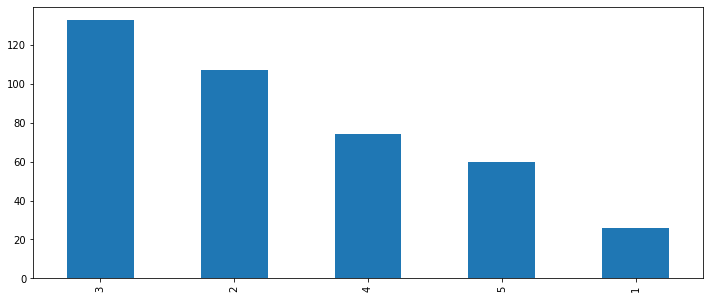

In [18]:
plt.figure(figsize=(12,5))
#sns.countplot('University Rating',data=df)
df['University Rating'].value_counts().plot.bar()

In [37]:
#df['SOP'].value_counts().plot.bar()
df['SOP'].value_counts()

3.5    70
4.0    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

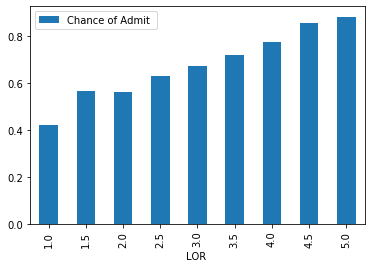

In [47]:
df.groupby('LOR ').agg({'Chance of Admit ':'mean'}).plot.bar()

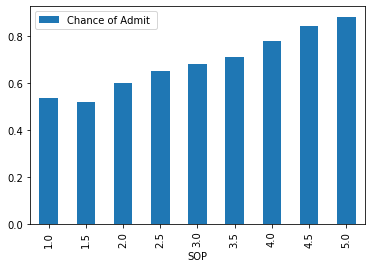

In [46]:
df.groupby('SOP').agg({'Chance of Admit ':'mean'}).plot.bar()

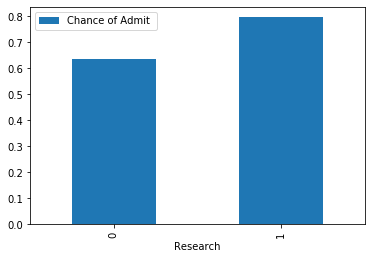

In [48]:
df.groupby('Research').agg({'Chance of Admit ':'mean'}).plot.bar()


In [34]:
#df['LOR '].value_counts().plot.bar()
df['LOR '].value_counts()

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR , dtype: int64

In [31]:
#pd.crosstab(df['University Rating'],columns='count')
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

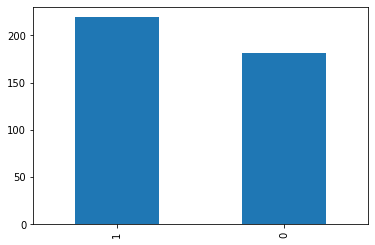

In [32]:
df['Research'].value_counts().plot.bar()

## Analysis of continuous variables


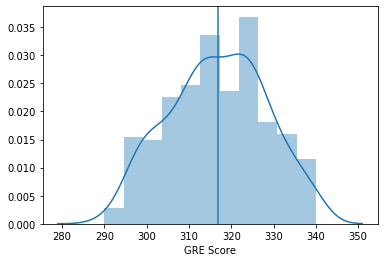

In [54]:
sns.distplot(df['GRE Score'])
plt.axvline(x= df['GRE Score'].mean())

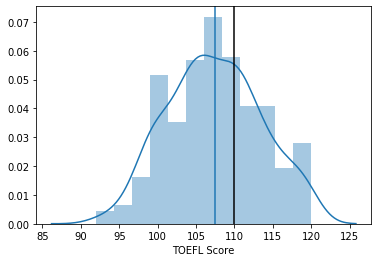

In [60]:
sns.distplot(df['TOEFL Score'])
plt.axvline(x= df['TOEFL Score'].mean())
plt.axvline(x= df['TOEFL Score'].mode()[0],color='black')

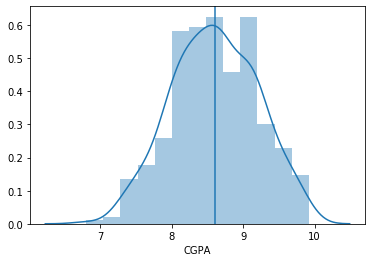

In [56]:
sns.distplot(df['CGPA'])
plt.axvline(x= df['CGPA'].mean())


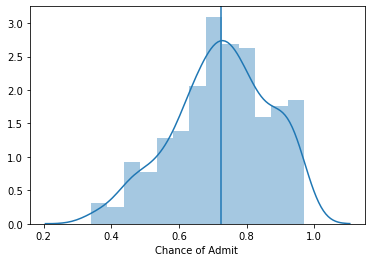

In [57]:
sns.distplot(df['Chance of Admit '])
plt.axvline(x= df['Chance of Admit '].mean())



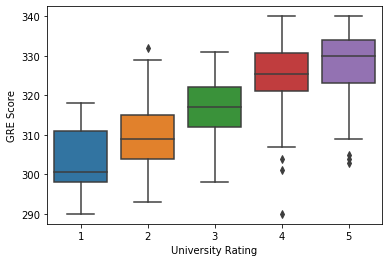

In [61]:
sns.boxplot(x='University Rating',y='GRE Score',data=df)

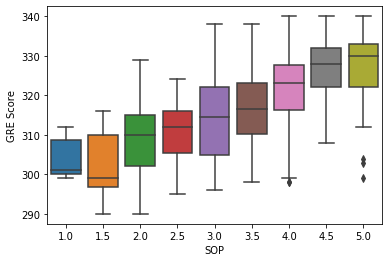

In [71]:
sns.boxplot(x='SOP',y='GRE Score',data=df)

                  GRE Score  Chance of Admit 
GRE Score           1.00000           0.80261
Chance of Admit     0.80261           1.00000


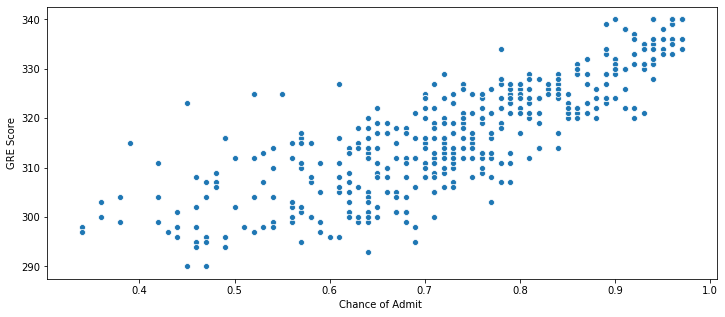

In [92]:
#sns.boxplot(x='GRE Score',y='Chance of Admit ',data=df)
plt.figure(figsize=(12,5))
a= df.groupby('GRE Score').agg({'Chance of Admit ':'mean'})
b = df[['GRE Score','Chance of Admit ']].corr()
print(b)
sns.scatterplot(x='Chance of Admit ',y='GRE Score',data=df)

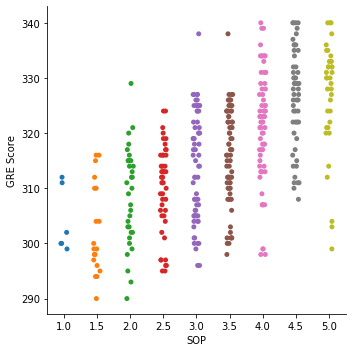

In [90]:
sns.catplot( x='SOP',y='GRE Score',data=df)

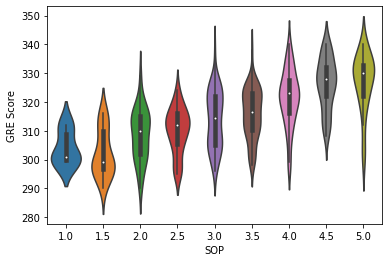

In [93]:
sns.violinplot(x='SOP',y='GRE Score',data=df)